In [30]:
from leap_ec.probe import FitnessStatsCSVProbe
from leap_ec.real_rep.problems import plot_2d_problem
from leap_ec.contrib import analysis
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
from scipy import stats

from async_sim import components as co

In [2]:
!mkdir -p ./figures/

In [3]:
def plot_pair(f1, f2, dimensions):
    p1 = co.get_standard_function(f1, dimensions)
    p2 = co.get_standard_function(f2, dimensions)
    
    pad_val = 0  # Value to fix higher-dimensional values at when projecting landscapes into 2-D visuals
    pad_vec = np.array([pad_val]*(dimensions - 2))
    
    plt.subplot(121, projection='3d')
    plot_2d_problem(p1, pad=pad_vec, ax=plt.gca(), cmap=cm.coolwarm)
    plt.title("Fitness")
    
    plt.subplot(122, projection='3d')
    plot_2d_problem(p2, pad=pad_vec, ax=plt.gca(), cmap=cm.coolwarm)
    plt.title("Evaluation-Time")
    plt.tight_layout()

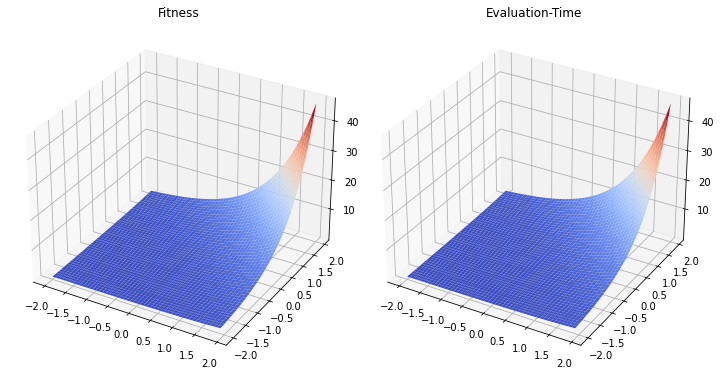

In [4]:
plt.figure(figsize=(10,6))
plot_pair('exponential-growth', 'exponential-growth', dimensions=10)
plt.savefig('figures/2022-03-07_function_pair_exponential_correlated.pdf', format='pdf')

In [5]:
def load_file(name, condition):
    df_ = pd.read_csv(f"{name}", skipinitialspace=True, comment='#')
    df_['condition'] = condition
    assert(len(df_.job.unique()) == 100)
    assert(len(df_.step.unique()) == 5000/10)
    return df_

In [19]:
def bsf_plot(df):
    time_col = 'step'
    modulo = 50
    max_time = float('inf')
    df = df[df[time_col] % modulo == 0]  # Select every nth step
    df = df[df[time_col] < max_time]  # Cut off end of runs

    analyzer = analysis.CurveAnalyzer(df,
                                      time_col=time_col,
                                      experiment_cols=['condition'],
                                      metric_cols=FitnessStatsCSVProbe.default_metric_cols)
    plotter = analysis.CurvePlotter(analyzer)
    metric_col = 'bsf'
    ylog=False
    error=True
    ylim=(None, None)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plotter.plot_avg_curves(metric_col, f"Average {metric_col} Curves", error, ylim, ylog=ylog, ax=plt.gca())
    plt.subplot(122)
    plotter.plot_scalars_bar(metric_col, title='Area Under Curve', ax=plt.gca())
    plt.xlabel('')
    plt.tight_layout()
    
    return analyzer.scalar_metrics_per_run(metric_col=metric_col)
    

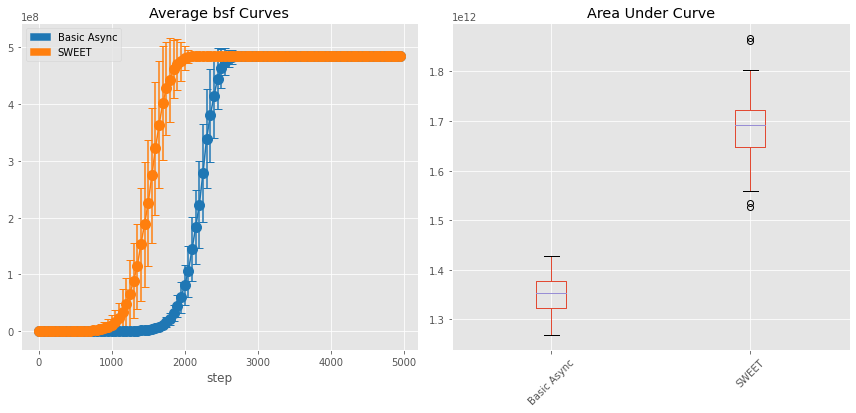

In [21]:
control = load_file('2022-03-07_sweet_results/immediate_exponential_correlated_popsize50.csv', 'Basic Async')
treatment = load_file('2022-03-07_sweet_results/immediate_exponential_correlated_popsize50_w_sweet.csv', 'SWEET')
df_auc = bsf_plot(pd.concat([control, treatment]))
plt.savefig('figures/2022-03-07_function_pair_exponential_correlated_bsf.pdf', format='pdf')

In [28]:
df_auc.groupby(['condition']).auc.median()

condition
Basic Async    1.353297e+12
SWEET          1.692353e+12
Name: auc, dtype: float64

In [31]:
stats.ranksums(
    df_auc[df_auc.condition == 'Basic Async'].auc,
    df_auc[df_auc.condition == 'SWEET'].auc
)

RanksumsResult(statistic=-12.216944435630522, pvalue=2.5239394239903128e-34)

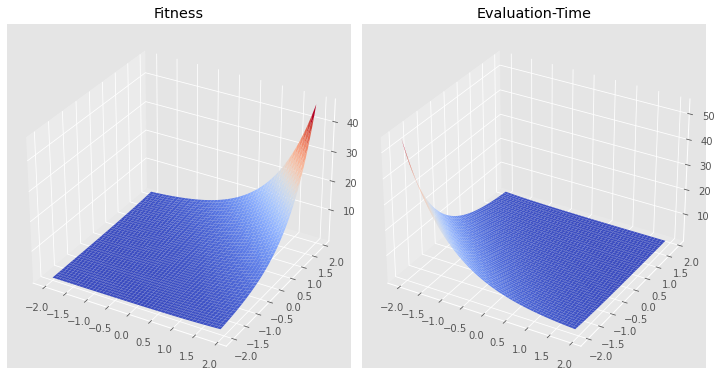

In [9]:
plt.figure(figsize=(10,6))
plot_pair('exponential-growth', 'exponential-decay', dimensions=10)
plt.savefig('figures/2022-03-07_function_pair_exponential_anticorrelated.pdf', format='pdf')

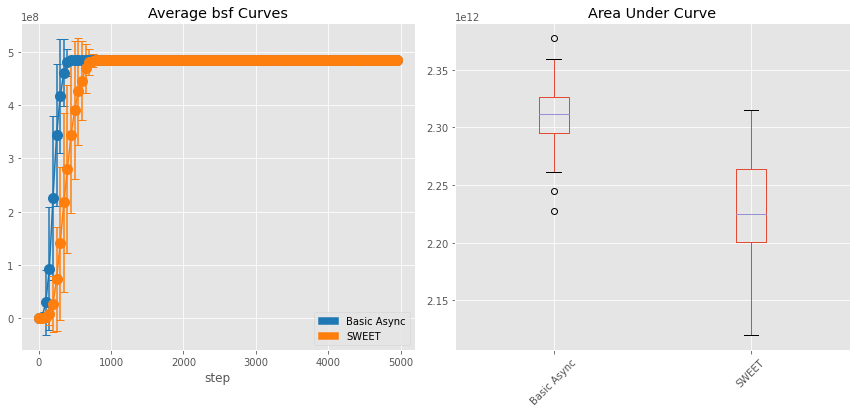

In [32]:
control = load_file('2022-03-07_sweet_results/immediate_exponential_anticorrelated_popsize50.csv', 'Basic Async')
treatment = load_file('2022-03-07_sweet_results/immediate_exponential_anticorrelated_popsize50_w_sweet.csv', 'SWEET')
df_auc = bsf_plot(pd.concat([control, treatment]))
plt.savefig('figures/2022-03-07_function_pair_exponential_anticorrelated_bsf.pdf', format='pdf')

In [33]:
df_auc.groupby(['condition']).auc.median()

condition
Basic Async    2.311685e+12
SWEET          2.224739e+12
Name: auc, dtype: float64

In [34]:
stats.ranksums(
    df_auc[df_auc.condition == 'Basic Async'].auc,
    df_auc[df_auc.condition == 'SWEET'].auc
)

RanksumsResult(statistic=10.921948325453688, pvalue=9.053261568850824e-28)

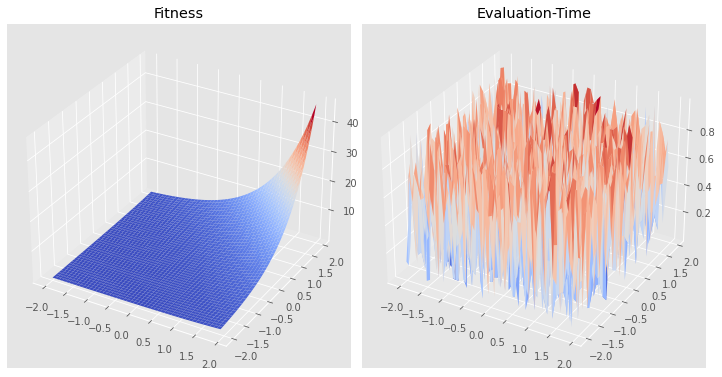

In [35]:
plt.figure(figsize=(10,6))
plot_pair('exponential-growth', 'random-uniform', dimensions=10)
plt.savefig('figures/2022-03-07_function_pair_exponential_uncorrelated.pdf', format='pdf')

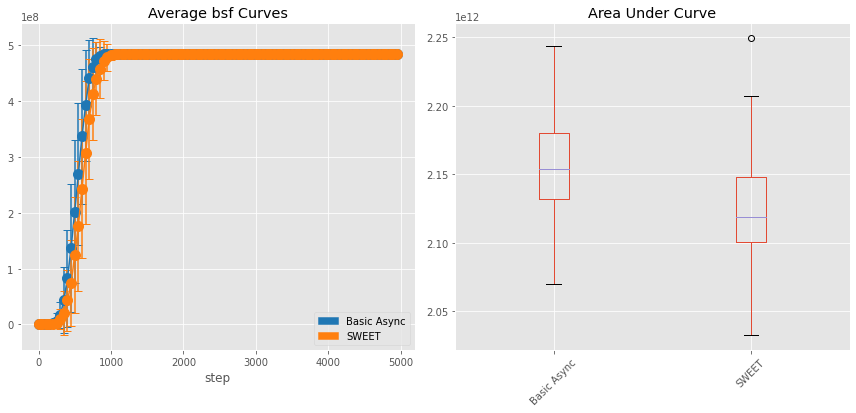

In [36]:
control = load_file('2022-03-07_sweet_results/immediate_exponential_uncorrelated_popsize50.csv', 'Basic Async')
treatment = load_file('2022-03-07_sweet_results/immediate_exponential_uncorrelated_popsize50_w_sweet.csv', 'SWEET')
df_auc = bsf_plot(pd.concat([control, treatment]))
plt.savefig('figures/2022-03-07_function_pair_exponential_uncorrelated_bsf.pdf', format='pdf')

In [37]:
df_auc.groupby(['condition']).auc.median()

condition
Basic Async    2.153803e+12
SWEET          2.118992e+12
Name: auc, dtype: float64

In [39]:
stats.ranksums(
    df_auc[df_auc.condition == 'Basic Async'].auc,
    df_auc[df_auc.condition == 'SWEET'].auc
)

RanksumsResult(statistic=5.79571844026312, pvalue=6.802931552858312e-09)

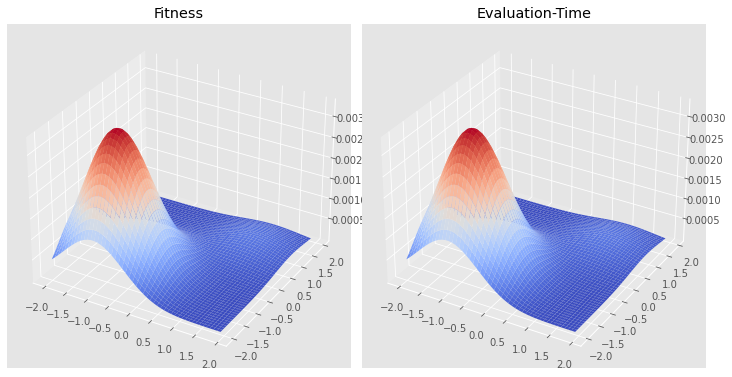

In [13]:
plt.figure(figsize=(10,6))
plot_pair('two-basin-a-better', 'two-basin-a-better', dimensions=10)
plt.savefig('figures/2022-03-07_function_pair_twobasin_correlated.pdf', format='pdf')

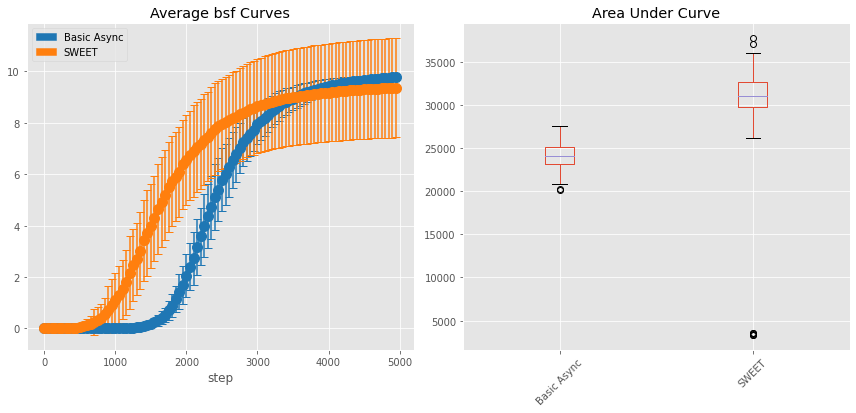

In [40]:
control = load_file('2022-03-07_sweet_results/immediate_twobasin_correlated_popsize50.csv', 'Basic Async')
treatment = load_file('2022-03-07_sweet_results/immediate_twobasin_correlated_popsize50_w_sweet.csv', 'SWEET')
df_auc = bsf_plot(pd.concat([control, treatment]))
plt.savefig('figures/2022-03-07_function_pair_twobasin_correlated_bsf.pdf', format='pdf')

In [41]:
df_auc.groupby(['condition']).auc.median()

condition
Basic Async    24135.856258
SWEET          31051.401478
Name: auc, dtype: float64

In [42]:
stats.ranksums(
    df_auc[df_auc.condition == 'Basic Async'].auc,
    df_auc[df_auc.condition == 'SWEET'].auc
)

RanksumsResult(statistic=-10.93905204766357, pvalue=7.497976906760681e-28)

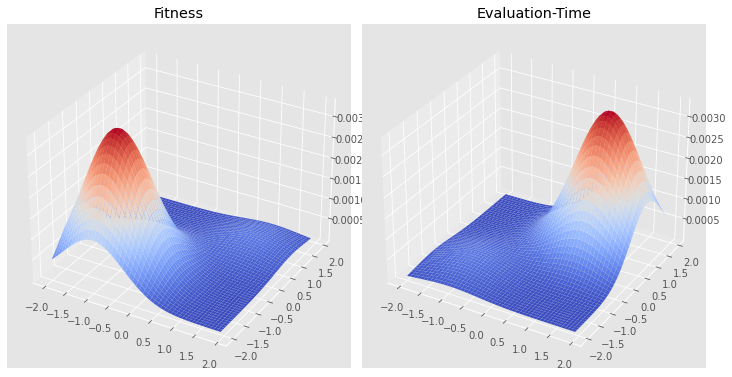

In [43]:
plt.figure(figsize=(10,6))
plot_pair('two-basin-a-better', 'two-basin-b-better', dimensions=10)
plt.savefig('figures/2022-03-07_function_pair_twobasin_anticorrelated.pdf', format='pdf')

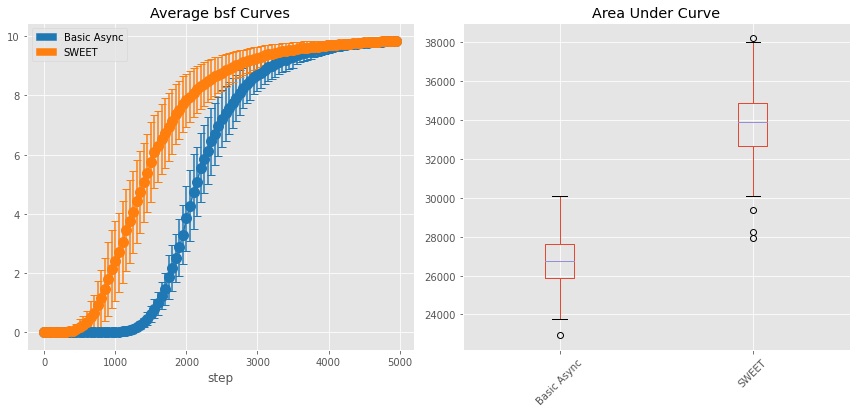

In [45]:
control = load_file('2022-03-07_sweet_results/immediate_twobasin_anticorrelated_popsize50.csv', 'Basic Async')
treatment = load_file('2022-03-07_sweet_results/immediate_twobasin_anticorrelated_popsize50_w_sweet.csv', 'SWEET')
df_auc = bsf_plot(pd.concat([control, treatment]))
plt.savefig('figures/2022-03-07_function_pair_twobasin_anticorrelated_bsf.pdf', format='pdf')

In [46]:
df_auc.groupby(['condition']).auc.median()

condition
Basic Async    26763.510028
SWEET          33881.412502
Name: auc, dtype: float64

In [47]:
stats.ranksums(
    df_auc[df_auc.condition == 'Basic Async'].auc,
    df_auc[df_auc.condition == 'SWEET'].auc
)

RanksumsResult(statistic=-12.13631260235536, pvalue=6.7813774760958084e-34)

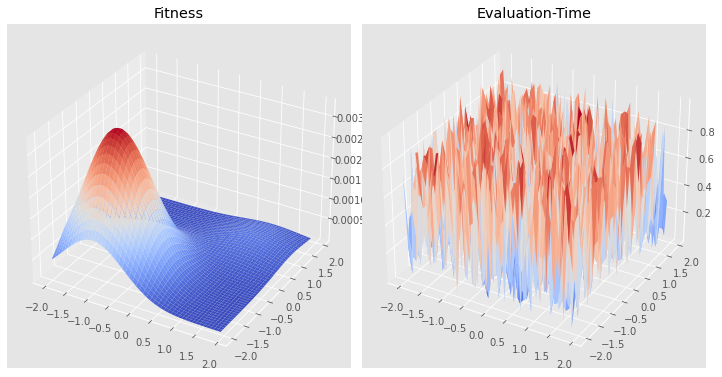

In [17]:
plt.figure(figsize=(10,6))
plot_pair('two-basin-a-better', 'random-uniform', dimensions=10)
plt.savefig('figures/2022-03-07_function_pair_twobasin_uncorrelated.pdf', format='pdf')

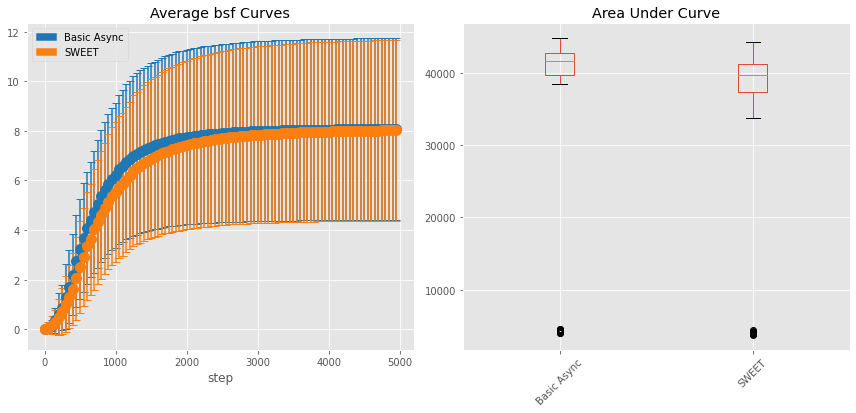

In [48]:
control = load_file('2022-03-07_sweet_results/immediate_twobasin_uncorrelated_popsize50.csv', 'Basic Async')
treatment = load_file('2022-03-07_sweet_results/immediate_twobasin_uncorrelated_popsize50_w_sweet.csv', 'SWEET')
df_auc = bsf_plot(pd.concat([control, treatment]))
plt.savefig('figures/2022-03-07_function_pair_twobasin_uncorrelated_bsf.pdf', format='pdf')

In [49]:
df_auc.groupby(['condition']).auc.median()

condition
Basic Async    41555.810171
SWEET          39708.236001
Name: auc, dtype: float64

In [50]:
stats.ranksums(
    df_auc[df_auc.condition == 'Basic Async'].auc,
    df_auc[df_auc.condition == 'SWEET'].auc
)

RanksumsResult(statistic=4.268600385809305, pvalue=1.9670330059734253e-05)

In [54]:
5e-4

0.0005